11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.9174 - loss: 0.2713 - val_accuracy: 0.9799 - val_loss: 0.0639
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9735 - loss: 0.0915 - val_accuracy: 0.9857 - val_loss: 0.0490
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9805 - loss: 0.0661 - val_accuracy: 0.9875 - val_loss: 0.0423
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9845 - loss: 0.0528 - val_accuracy: 0.9890 - val_loss: 0.0346
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9870 - loss: 0.0433 - val_accuracy: 0.9895 - val_loss: 0.0357


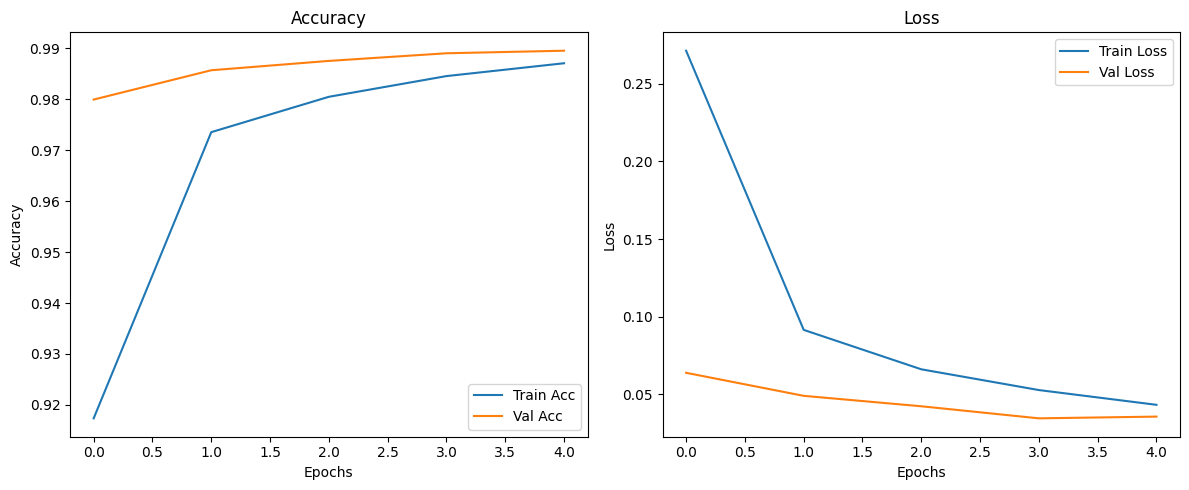

✅ Test Accuracy: 0.9920


In [1]:
# ============================================
# ✅ Task 4: Simple Handwritten Digit Recognition (CNN)
# Dataset: MNIST (built-in)
# ============================================

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ----------------------------
# 📂 Step 1: Load Dataset
# ----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# ----------------------------
# 📊 Step 2: Preprocessing
# ----------------------------
# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension (grayscale → 1 channel)
x_train = np.expand_dims(x_train, -1)   # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# ----------------------------
# 🧠 Step 3: CNN Model
# ----------------------------
model = Sequential([
    Input(shape=(28,28,1)),     # MNIST images are 28x28 grayscale
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(optimizer=Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# ----------------------------
# 🚀 Step 4: Train Model
# ----------------------------
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64
)

# ----------------------------
# 📈 Step 5: Plot Training History
# ----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# ----------------------------
# 🎯 Step 6: Evaluate
# ----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")
